In [ ]:
#### Code for Section 4 (Sequence to Embedding Model)   # 2
from random import shuffle
length_index = int(len(all_lines)/3)
all_indexes = list(range(0,length_index))
shuffle(all_indexes)
print(all_indexes[:10])

In [ ]:
#### Code for Section 4 (Sequence to Embedding Model)   # 3

#file_write = gzip.open("randomized_superfam_all_bacteria_and_archaea_sequences_and_embeddings.gz", "wt")
#file_write = gzip.open("randomized_superfam_all_bacteria_and_archaea_sequences_and_embeddings_test.gz", "wt")
file_write = gzip.open("randomized_superfam_16S_bacteria_and_archaea_sequences_and_embeddings_train.gz", "wt")
count = 0
for i in all_indexes:
    idx = i*3
    file_write.write(all_lines[idx])
    file_write.write(all_lines[idx+1])
    file_write.write(all_lines[idx+2])
    count += 1
    #if (count%100 == 0):
     #   break
file_write.close()

In [ ]:
#### Code for Section 4 (Sequence to Embedding Model)   # 4
# read in the randomized input file and create input for network
# really short for now
import numpy as np
import h5py
alphabet = "NACGT"
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
time_steps = 100
batch_size = 1
category = 10
count = 0
X = []
Y = []
#with gzip.open("randomized_superfam_all_bacteria_and_archaea_sequences_and_embeddings_train.gz", 'rt') as zip_file:
#with gzip.open("randomized_superfam_all_bacteria_and_archaea_sequences_and_embeddings_test.gz", 'rt') as zip_file:
with gzip.open("randomized_superfam_16S_bacteria_and_archaea_sequences_and_embeddings_train.gz", 'rt') as zip_file:
    for header in zip_file:
        #if (count >= 100000):
        #if (count >= 1000):    
         #   break
        #print(line)
        x_data = zip_file.readline().strip()
        y_data = zip_file.readline().strip()
        integer_encoded = [char_to_int[char] for char in x_data]
        
        
        y_data = np.asarray(y_data[1:-1].split(", "))
        y_data = [float(i) for i in y_data]
        
        
        X.append(np.asarray(integer_encoded))#.reshape(batch_size, time_steps))
        #print("X_train Shape = ", X_train[-1].shape)
        Y.append(np.asarray(y_data)) #.reshape(batch_size, category))
        #print("Y_train Shape = ", Y_train[-1].shape)
        
        count += 1

#h5f_X = h5py.File('X_train_superfam_all_bacteria_and_archaea.h5', 'w')
#h5f_X = h5py.File('X_test_1K_superfam_all_bacteria_and_archaea.h5', 'w')
h5f_X = h5py.File('X_train_superfam_16S_bacteria_and_archaea.h5', 'w')
h5f_X.create_dataset('X', data=X)
h5f_X.close()
#h5f_Y = h5py.File('Y_train_superfam_all_bacteria_and_archaea.h5', 'w')
#h5f_Y = h5py.File('Y_test_1K_superfam_all_bacteria_and_archaea.h5', 'w')
h5f_Y = h5py.File('Y_train_superfam_16S_bacteria_and_archaea.h5', 'w')
h5f_Y.create_dataset('Y', data=Y)
h5f_Y.close()
print("done")

In [ ]:
print("hi")

In [ ]:
#### Code for Section 4 (Sequence to Embedding Model)   # 5

# Process test evaluation predictions from keras and associate them with labels
import numpy as np
import h5py

h5f = h5py.File('test_evaluation_Dec6_model_superfam_16S_bacteria_and_archaea.h5','r')
Y_Predictions = h5f['Y'][:]
h5f.close()

count = 0
file_write = gzip.open("test_evaluation_with_labels_Dec6_model_superfam_16S_bacteria_and_archaea_sequences_and_embeddings.gz", "wt")
with gzip.open("randomized_superfam_16S_bacteria_and_archaea_sequences_and_embeddings_test.gz", 'rt') as zip_file:
    for header in zip_file:
        #if (count >= 1000):
        #    break
        file_write.write(header.strip() + "\n")
        x_data = zip_file.readline().strip()
        y_data = zip_file.readline().strip()
        file_write.write(str(Y_Predictions[count].tolist()))
        file_write.write("\n")
        
        count += 1

file_write.close()

print("done")

In [ ]:
# Below, all for new experiment with siamese network
import gzip
all_lines = []
print("hello")
with gzip.open("pairs_and_distance_16S_train.gz", 'rt') as zip_file:
    all_lines = zip_file.readlines()
print(len(all_lines))

In [ ]:
from random import shuffle
length_index = int(len(all_lines)/4)
all_indexes = list(range(0,length_index))
shuffle(all_indexes)
print(all_indexes[:10])

In [ ]:
file_write = gzip.open("randomized_pairs_and_distance_16S_train.gz", "wt")
count = 0
for i in all_indexes:
    idx = i*4
    file_write.write(all_lines[idx])
    file_write.write(all_lines[idx+1])
    file_write.write(all_lines[idx+2])
    file_write.write(all_lines[idx+3])
    count += 1
    #if (count%100 == 0):
     #   break
file_write.close()

In [1]:
# 2nd experiment: create the h5py files for the twin network training set
# translate the input file into three h5py files
import numpy as np
import h5py
import gzip
alphabet = "NACGT"
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
time_steps = 100
batch_size = 1
category = 10
count = 0
X_a = []
X_b = []
Y = []
with gzip.open("randomized_pairs_and_distance_16S_train.gz", 'rt') as zip_file:
    for header in zip_file:
        
        x_a_data = zip_file.readline().strip()
        x_b_data = zip_file.readline().strip()
        y_data = zip_file.readline().strip()
        
        if ((len(x_a_data)!=100) or (len(x_b_data) != 100)):
            continue
        
        integer_encoded_a = [char_to_int[char] for char in x_a_data]
        integer_encoded_b = [char_to_int[char] for char in x_b_data]
        
        #print(integer_encoded_b)
        y_data = np.asarray(float(y_data))
        #y_data = [float(i) for i in y_data]
        
        
        X_a.append(np.asarray(integer_encoded_a))#.reshape(batch_size, time_steps))
        X_b.append(np.asarray(integer_encoded_b))
        #print("X_train Shape = ", X_train[-1].shape)
        Y.append(np.asarray(y_data)) #.reshape(batch_size, category))
        #print("Y_train Shape = ", Y_train[-1].shape)
        
        count += 1

h5f_X = h5py.File('X_train_twin_sequences_a.h5', 'w')
h5f_X.create_dataset('X_a', data=X_a)
h5f_X.close()
h5f_X = h5py.File('X_train_twin_sequences_b.h5', 'w')
h5f_X.create_dataset('X_b', data=X_b)
h5f_X.close()
h5f_Y = h5py.File('Y_train_twin_sequences.h5', 'w')
h5f_Y.create_dataset('Y', data=Y)
h5f_Y.close()
print("done")

done


In [2]:
# 2nd experiment: create the h5py files for the twin network test set
import numpy as np
import h5py
import gzip
alphabet = "NACGT"
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
time_steps = 100
batch_size = 1
category = 10
count = 0
X_a = []
X_b = []
Y = []
with gzip.open("pairs_and_distance_16S_test_seen_leaf_pairs.gz", 'rt') as zip_file:
    for header in zip_file:
        
        x_a_data = zip_file.readline().strip()
        x_b_data = zip_file.readline().strip()
        y_data = zip_file.readline().strip()
        
        if ((len(x_a_data)!=100) or (len(x_b_data) != 100)):
            continue
        
        integer_encoded_a = [char_to_int[char] for char in x_a_data]
        integer_encoded_b = [char_to_int[char] for char in x_b_data]
        
        #print(integer_encoded_b)
        y_data = np.asarray(float(y_data))
        #y_data = [float(i) for i in y_data]
        
        
        X_a.append(np.asarray(integer_encoded_a))#.reshape(batch_size, time_steps))
        X_b.append(np.asarray(integer_encoded_b))
        #print("X_train Shape = ", X_train[-1].shape)
        Y.append(np.asarray(y_data)) #.reshape(batch_size, category))
        #print("Y_train Shape = ", Y_train[-1].shape)
        
        count += 1

h5f_X = h5py.File('X_test_seen_leaf_pairs_twin_sequences_a.h5', 'w')
h5f_X.create_dataset('X_a', data=X_a)
h5f_X.close()
h5f_X = h5py.File('X_test_seen_leaf_pairs_twin_sequences_b.h5', 'w')
h5f_X.create_dataset('X_b', data=X_b)
h5f_X.close()
h5f_Y = h5py.File('Y_test_seen_leaf_pairs_twin_sequences.h5', 'w')
h5f_Y.create_dataset('Y', data=Y)
h5f_Y.close()
print("done")

done


Mean Square Error
0.00336962418114
Mean Error
0.0443761275503


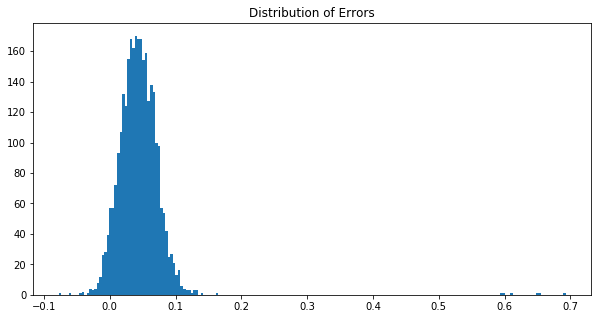

In [19]:
# For Siamese Network: Process test evaluation predictions from keras and associate them with labels
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import numpy as np
import h5py
import math

h5f = h5py.File('test_evaluation_Jan15_model_twin_sequences.h5','r')
Y_Predictions = h5f['Y'][:]
h5f.close()

h5f = h5py.File('Y_test_seen_leaf_pairs_twin_sequences.h5','r')
Y_Real = h5f['Y'][:]
h5f.close()

sq_errors = []
errors = []
for i in range(0, len(Y_Real)):
    errors.append(Y_Real[i] - Y_Predictions[i][0])
    sq_errors.append(math.pow(Y_Real[i] - Y_Predictions[i][0], 2))

print("Mean Square Error")
print(np.mean(sq_errors))
print("Mean Error")
print(np.mean(errors))
plt.figure(1, figsize=(10, 5))
plt.hist(errors, bins=200)
plt.title("Distribution of Errors")
plt.show()

In [ ]:
# all cells below for pairs_positive_negative examples

In [20]:
import gzip
all_lines = []
print("hello")
with gzip.open("pairs_pos_neg_16S_train.gz", 'rt') as zip_file:
    all_lines = zip_file.readlines()
print(len(all_lines))

hello
396728


In [21]:
from random import shuffle
length_index = int(len(all_lines)/4)
all_indexes = list(range(0,length_index))
shuffle(all_indexes)
print(all_indexes[:10])

[56000, 41724, 53819, 73656, 91754, 82117, 47306, 38047, 35791, 94317]


In [22]:
file_write = gzip.open("randomized_pairs_pos_neg_16S_train.gz", "wt")
count = 0
for i in all_indexes:
    idx = i*4
    file_write.write(all_lines[idx])
    file_write.write(all_lines[idx+1])
    file_write.write(all_lines[idx+2])
    file_write.write(all_lines[idx+3])
    count += 1
    #if (count%100 == 0):
     #   break
file_write.close()

In [24]:
# create the h5py files for the pairs pos neg set
# translate the input file into three h5py files
import numpy as np
import h5py
import gzip
alphabet = "NACGT"
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))
time_steps = 100
batch_size = 1
category = 10
count = 0
X_a = []
X_b = []
Y = []
with gzip.open("pairs_pos_neg_16S_test.gz", 'rt') as zip_file: #randomized_pairs_pos_neg_16S_train.gz
    for header in zip_file:
        
        x_a_data = zip_file.readline().strip()
        x_b_data = zip_file.readline().strip()
        y_data = zip_file.readline().strip()
        
        if ((len(x_a_data)!=100) or (len(x_b_data) != 100)):
            continue
        
        integer_encoded_a = [char_to_int[char] for char in x_a_data]
        integer_encoded_b = [char_to_int[char] for char in x_b_data]
        
        #print(integer_encoded_b)
        y_data = np.asarray(int(y_data))
        #y_data = [float(i) for i in y_data]
        
        
        X_a.append(np.asarray(integer_encoded_a))#.reshape(batch_size, time_steps))
        X_b.append(np.asarray(integer_encoded_b))
        #print("X_train Shape = ", X_train[-1].shape)
        Y.append(np.asarray(y_data)) #.reshape(batch_size, category))
        #print("Y_train Shape = ", Y_train[-1].shape)
        
        count += 1

h5f_X = h5py.File('X_test_pairs_pos_neg_a.h5', 'w') #X_train_pairs_pos_neg_a.h5
h5f_X.create_dataset('X_a', data=X_a)
h5f_X.close()
h5f_X = h5py.File('X_test_pairs_pos_neg_b.h5', 'w') #X_train_pairs_pos_neg_b.h5
h5f_X.create_dataset('X_b', data=X_b)
h5f_X.close()
h5f_Y = h5py.File('Y_test_pairs_pos_neg.h5', 'w') #Y_train_pairs_pos_neg.h5
h5f_Y.create_dataset('Y', data=Y)
h5f_Y.close()
print("done")

done
